<a href="https://colab.research.google.com/github/MohsinIrshad97/data-science--fiverr/blob/main/cross_validation_best_features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import itertools

from collections import Counter
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import LabelEncoder

In [2]:
#loading the data
df = pd.read_csv("https://raw.githubusercontent.com/albanda/CE888/master/lab3/bank-additional-full.csv", delimiter = ";")
df.head()


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
#data preprocessing
#    * Use LabelEncoder to convert the label into numbers.
# convert a string variable to a categorical one
df = df.apply(LabelEncoder().fit_transform)

df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,39,3,1,0,0,0,0,1,6,1,261,0,26,0,1,8,18,16,287,8,0
1,40,7,1,3,1,0,0,1,6,1,149,0,26,0,1,8,18,16,287,8,0
2,20,7,1,3,0,2,0,1,6,1,226,0,26,0,1,8,18,16,287,8,0
3,23,0,1,1,0,0,0,1,6,1,151,0,26,0,1,8,18,16,287,8,0
4,39,7,1,3,0,0,2,1,6,1,307,0,26,0,1,8,18,16,287,8,0


In [4]:
#    * Check if there are any missing values in the dataset. If there are, drop the rows.
#for dropping rows with NaNs
print("Number of rows before dropping NaNs: %d" % len(df))
df = df.dropna()
print("Number of rows after dropping NaNs: %d" % len(df))
#to delete the duration column
df.pop("duration")
df.head()

Number of rows before dropping NaNs: 41188
Number of rows after dropping NaNs: 41188


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,39,3,1,0,0,0,0,1,6,1,0,26,0,1,8,18,16,287,8,0
1,40,7,1,3,1,0,0,1,6,1,0,26,0,1,8,18,16,287,8,0
2,20,7,1,3,0,2,0,1,6,1,0,26,0,1,8,18,16,287,8,0
3,23,0,1,1,0,0,0,1,6,1,0,26,0,1,8,18,16,287,8,0
4,39,7,1,3,0,0,2,1,6,1,0,26,0,1,8,18,16,287,8,0


In [5]:
#input variable
c_names=list(df.columns)

c_names.pop(19)
#print(c_names)

input = c_names
# I have not included "contact" as it is binary not categorical
categorical_variables= ["job", "marital", "education","default","housing", "loan","month","day_of_week","poutcome" ]
X_df1 = df[input].copy()
X_df= pd.get_dummies(X_df1, columns=categorical_variables)

X_df.head()



,age,contact,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,job_10,job_11,marital_0,marital_1,marital_2,marital_3,education_0,education_1,education_2,education_3,education_4,education_5,education_6,education_7,default_0,default_1,default_2,housing_0,housing_1,housing_2,loan_0,loan_1,loan_2,month_0,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,poutcome_0,poutcome_1,poutcome_2
0,39,1,0,26,0,8,18,16,287,8,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,40,1,0,26,0,8,18,16,287,8,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,20,1,0,26,0,8,18,16,287,8,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,23,1,0,26,0,8,18,16,287,8,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,39,1,0,26,0,8,18,16,287,8,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


'#output variables\n\ny_df = df[y]\nprint(y_df.shape)\ny_df.head()\n'

In [6]:
#output variables

y_df = df["y"]
print(y_df.shape)

y_df.head()

#it has to be on 'array' type


(41188,)


0    0
1    0
2    0
3    0
4    0
Name: y, dtype: int64

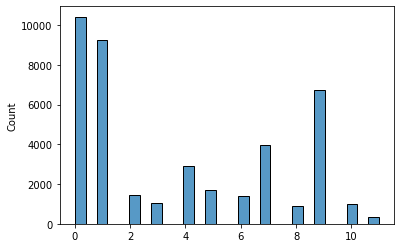

In [10]:
#    * Plot histogram of the label and calculate the imbalance in the dataset.
#9 variables for label
input = ["job","marital", "education","default","housing", "loan","contact","month","day_of_week"]
x1= X_df1[input].values.T[0]
#y= df["y"].values.T[0]

#x1 = (x1 - x1.min())/(x1.max() - x1.min())

sns_plot = sns.histplot(x1, kde=False)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


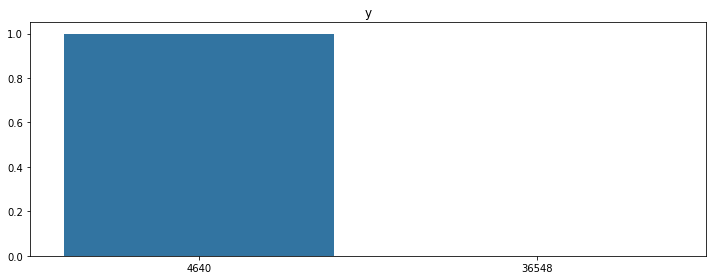

In [17]:
input = ["y"]
for col in input:
  plt.figure(figsize=(10,4))
  sns.barplot(df[col].value_counts().values, df[col].value_counts().index)
  plt.title(col)
  plt.tight_layout()

In [7]:
#modelling 

# Splitting the dataset into the Training set and Test set

# split imbalanced dataset into train and test sets with stratification

# count before split
print(Counter(y_df))
# split into train test sets
#, stratify=y_df
X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.20, random_state=50 )
#Stratified means that the percentages of classes in each fold remains constant.
#check by the ratio
print(Counter(y_train))
print(Counter(y_test))


Counter({0: 36548, 1: 4640})
Counter({0: 29260, 1: 3690})
Counter({0: 7288, 1: 950})


In [8]:
X_train.head()

,age,contact,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_0,job_1,job_2,job_3,job_4,job_5,job_6,job_7,job_8,job_9,job_10,job_11,marital_0,marital_1,marital_2,marital_3,education_0,education_1,education_2,education_3,education_4,education_5,education_6,education_7,default_0,default_1,default_2,housing_0,housing_1,housing_2,loan_0,loan_1,loan_2,month_0,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,day_of_week_0,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,poutcome_0,poutcome_1,poutcome_2
33479,15,0,1,26,0,3,8,4,209,6,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
36397,14,0,0,26,0,2,9,9,202,5,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0
10925,11,1,1,26,0,9,23,8,306,10,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0
8877,24,1,0,26,0,9,23,8,293,10,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0
32199,27,0,0,26,1,3,8,4,211,6,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0


In [12]:
#without Cross Validation (cv)
clf = RandomForestClassifier(n_estimators=100, max_depth=6,random_state=60)

clf.fit(X_train, y_train)
#for generalization error
predict=clf.predict(X_test)
#print("accuracy:",acc(y_test, predict),"\n")
print("f1_score: %.2f "% (f1_score(y_test, predict)))
#print("classification_report : \n", classification_report(y_test, predict))
print("mean squared error: %.2f "% (mse(y_test, predict)))



f1_score: 0.28 
mean squared error: 0.11 


In [10]:

#for best features
b=list(X_train.columns)
f_imp=pd.Series(clf.feature_importances_,index=b).sort_values()
#print(clf.feature_importances_)
print(f_imp)

default_2       0.000000
education_4     0.000076
marital_3       0.000100
job_3           0.000300
job_2           0.000338
                  ...   
poutcome_2      0.086205
emp.var.rate    0.087159
pdays           0.116703
nr.employed     0.171286
euribor3m       0.232682
Length: 61, dtype: float64


In [11]:
# * Report the results of 10-fold stratified cross-validation on the training set using a random forest classifier with 100 trees and depth=3.
# **Ensure you're using an appropriate metric** (Use `sorted(sklearn.metrics.SCORERS.keys())` to see what are the valid options).

#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)

clf = RandomForestClassifier(n_estimators=200, max_depth=12,random_state=60)
scores = cross_val_score(clf, X_train, y_train, cv=10,scoring=make_scorer(f1_score, average="weighted"))  # cross-validation
print("ACC: %.2f +/- %.2f" % (scores.mean(), scores.std()))





ACC: 0.88 +/- 0.00


In [22]:
dummy_clf = DummyClassifier(strategy='stratified')
#dummy_clf.fit(X_train, y_train)
dummy_scores = cross_val_score(dummy_clf, X_train, y_train, cv=10, scoring=make_scorer(acc))
print("Dummy ACC: %0.2f +/- %0.2f" % (dummy_scores.mean(), dummy_scores.std()))


Dummy ACC: 0.80 +/- 0.01


In [52]:
#Compare the results of your classifier with that of a dummy classifier.

'''Why use cross-validation?
I When we divide the original dataset in 3 partitions, we reduce
the number of samples which can be used for learning the
model
I What happens if we got lucky with our validation set?
I With cross-validation we can now calculate the validation error
in each of the validation folds
I So we’re more confident of the performance of our model
I We can get insights from our data
I Accuracies: 90%, 92%, 89%, 94%, 91%
I Accuracies: 90%, 92%, 89%, 40%, 91%
I Accuracies: 80%, 44%, 99%, 60%, 87%
I We can compare different classifiers in a more robust manner
I If we have two classifiers, one with accuracy = 95% and another
with accuracy = 93%, which one is better?'''



range(0, 20)


In [23]:
#* Use `GridSearchCV` to find a better set of parameters for your random forest.
#* Print the cross-validation metric (whichever you previously chose) that you obtain for the random forest for the best parameters found with GridSearchCV
#    * What are the top 3 features?
 #   * Report the generalisation error (still using the same metric) on your test set.
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 

param_grid = { 
    'n_estimators': range(100,1000,50),

    'max_depth' : range(20)
    
}

# Create a based model
rfc=RandomForestClassifier()
# Instantiate the grid search model
CV_rfc = GridSearchCV(estimator=rfc,param_grid=param_grid, cv= 2,verbose=2, n_jobs=-1)
CV_rfc.fit(X_train, y_train)

#for best parameters
CV_rfc.best_params_
    
    
    

Fitting 2 folds for each of 360 candidates, totalling 720 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 20.9min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 62.3min
[Parallel(n_jobs=-1)]: Done 720 out of 720 | elapsed: 74.8min finished


{'max_depth': 10, 'n_estimators': 450}